# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### Dataset diambil dari Kaggle dengan link https://www.kaggle.com/datasets/aayushmishra1512/fifa-2021-complete-player-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
raw_data = pd.read_csv("./data/FIFA-21 Complete.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
raw_data

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


In [6]:
print('Jumlah duplikasi: ', raw_data.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
raw_data.isna().sum()

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [8]:
raw_data.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


In [75]:
numeric_features = raw_data.select_dtypes(include=['number']).columns
numeric_features

Index(['nationality', 'position', 'overall', 'age', 'hits', 'potential',
       'team'],
      dtype='object')

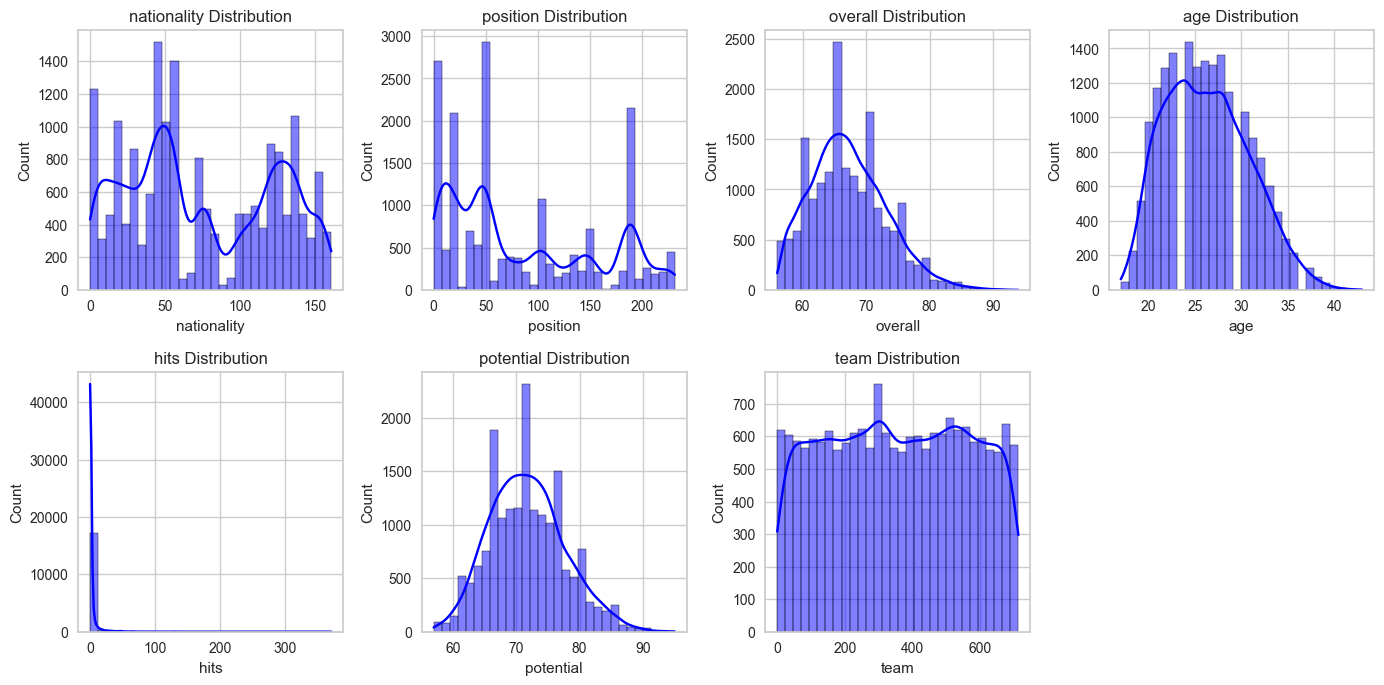

In [76]:

plt.figure(figsize=(14, 10))
for i, column in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(raw_data[column], bins=30, kde=True, color='blue')
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()

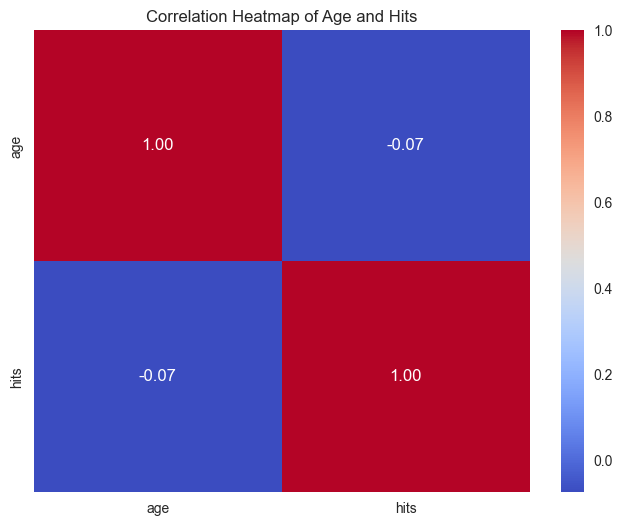

In [77]:
corr = raw_data[['age', 'hits']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Age and Hits')
plt.show()

In [11]:
nationality_counts = raw_data['nationality'].value_counts()
nationality_counts

nationality
England      1496
Germany      1138
Spain        1055
Argentina     970
France        948
             ... 
Ethiopia        1
Gibraltar       1
Macau           1
Barbados        1
Nicaragua       1
Name: count, Length: 162, dtype: int64

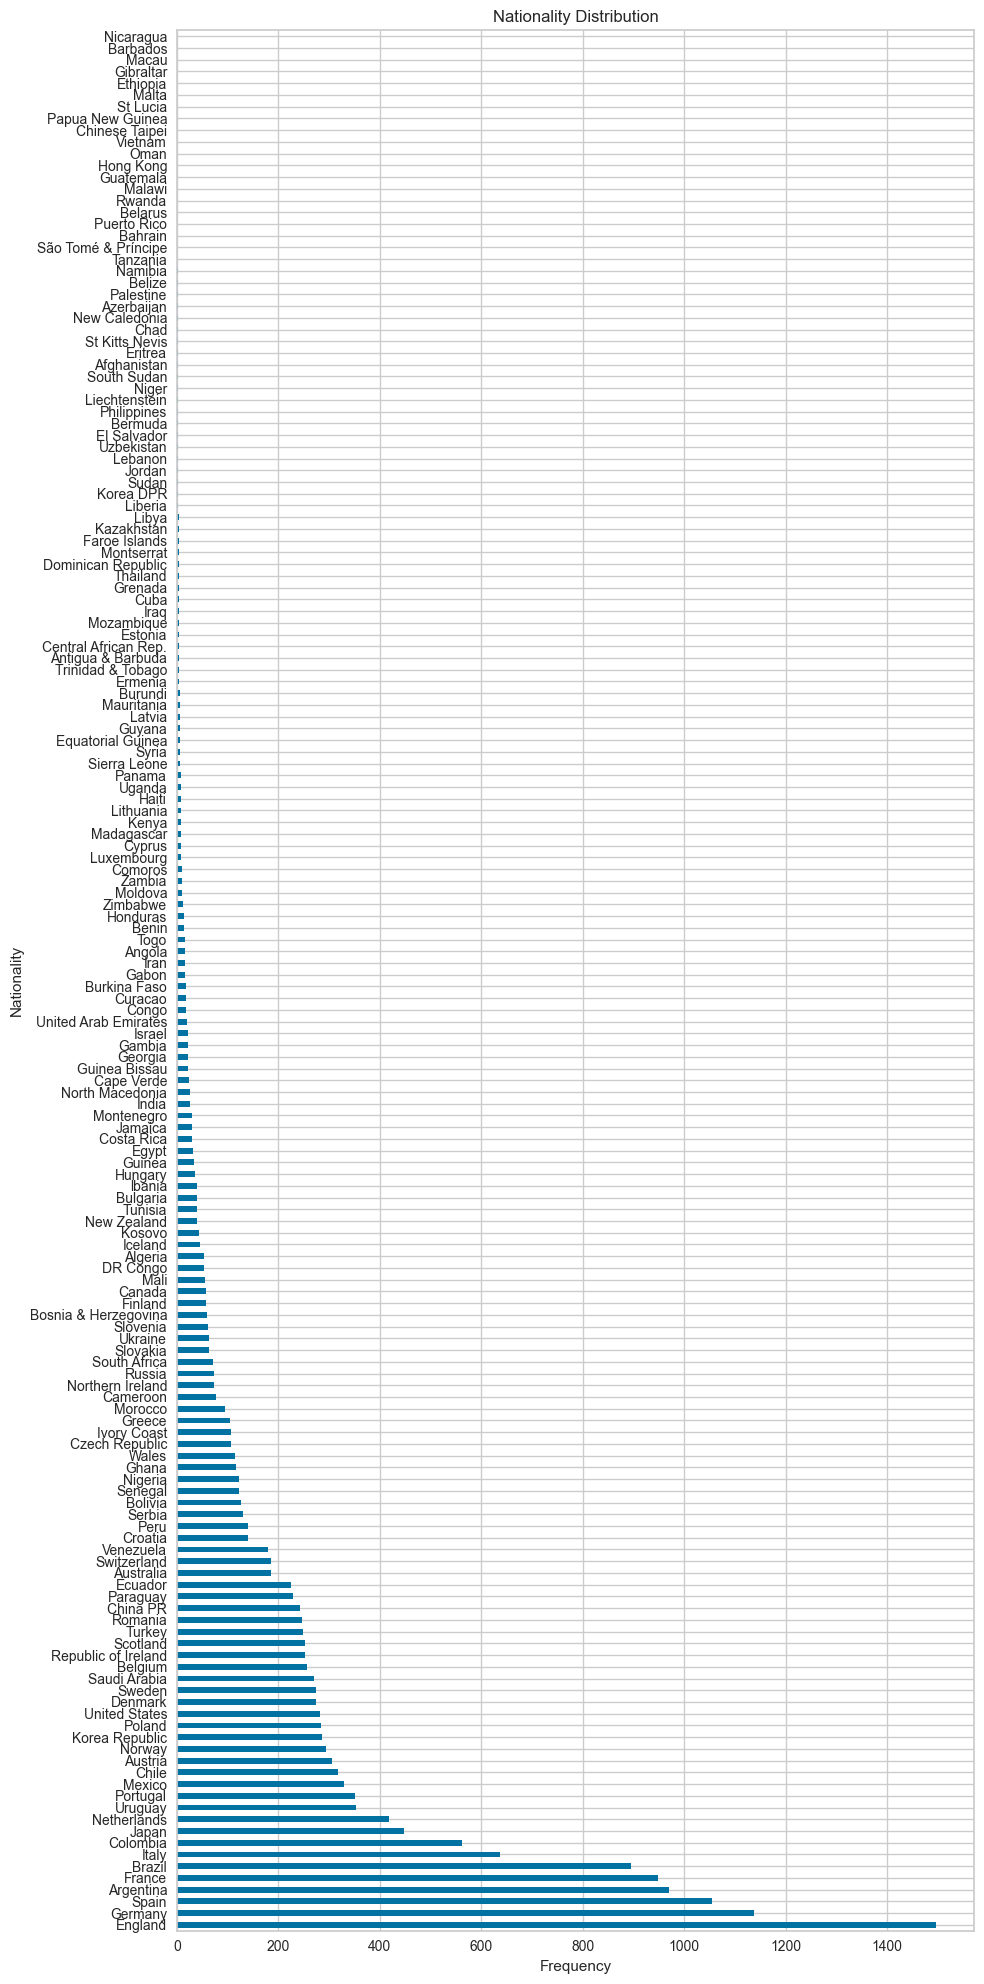

In [12]:
plt.figure(figsize=(10, 20))
nationality_counts.plot(kind='barh')
plt.title('Nationality Distribution')
plt.xlabel('Frequency')
plt.ylabel('Nationality')
plt.tight_layout()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [13]:
raw_data.isna().sum()

player_id      0
name           0
nationality    0
position       0
overall        0
age            0
hits           0
potential      0
team           0
dtype: int64

In [14]:
raw_data.duplicated().sum()

np.int64(0)

In [15]:
raw_data.drop('player_id', axis=1, inplace=True)

In [16]:
raw_data

,name,nationality,position,overall,age,hits,potential,team
0,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...
17976,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [19]:
raw_data.drop('name', axis=1, inplace=True)

In [20]:
raw_data

,nationality,position,overall,age,hits,potential,team
0,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,Portugal,ST|LW,93,35,276,93,Juventus
2,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,Netherlands,CB,91,29,127,92,Liverpool
4,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...
17976,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [21]:
# Label encoding
label_encoder_nationality = preprocessing.LabelEncoder() 
raw_data['nationality'] = label_encoder_nationality.fit_transform(raw_data['nationality'])
raw_data

,nationality,position,overall,age,hits,potential,team
0,4,ST|CF|RW,94,33,299,94,FC Barcelona
1,121,ST|LW,93,35,276,93,Juventus
2,17,CAM|LW,92,28,186,92,Paris Saint-Germain
3,104,CB,91,29,127,92,Liverpool
4,133,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...
17976,41,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,41,CM,56,23,0,64,Club Deportivo El Nacional
17978,156,ST,56,18,1,68,Zamora Fútbol Club
17979,156,RW,56,22,0,62,Zamora Fútbol Club


In [22]:
label_encoder_position = preprocessing.LabelEncoder() 
raw_data['position'] = label_encoder_position.fit_transform(raw_data['position'])
raw_data

,nationality,position,overall,age,hits,potential,team
0,4,199,94,33,299,94,FC Barcelona
1,121,212,93,35,276,93,Juventus
2,17,4,92,28,186,92,Paris Saint-Germain
3,104,7,91,29,127,92,Liverpool
4,133,48,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...
17976,41,188,56,21,0,64,Sociedad Deportiva Aucas
17977,41,38,56,23,0,64,Club Deportivo El Nacional
17978,156,188,56,18,1,68,Zamora Fútbol Club
17979,156,157,56,22,0,62,Zamora Fútbol Club


In [23]:
label_encoder_team = preprocessing.LabelEncoder() 
raw_data['team'] = label_encoder_team.fit_transform(raw_data['team'])
raw_data

,nationality,position,overall,age,hits,potential,team
0,4,199,94,33,299,94,243
1,121,212,93,35,276,93,375
2,17,4,92,28,186,92,487
3,104,7,91,29,127,92,417
4,133,48,91,27,47,93,64
...,...,...,...,...,...,...,...
17976,41,188,56,21,0,64,605
17977,41,38,56,23,0,64,163
17978,156,188,56,18,1,68,708
17979,156,157,56,22,0,62,708


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [26]:
splitted = raw_data.iloc[:, [4,5]]
clusters = 3

kmeans = KMeans(n_clusters=clusters)
labels = kmeans.fit_predict(splitted)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [28]:
score = silhouette_score(splitted, labels=labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.8011735847438085


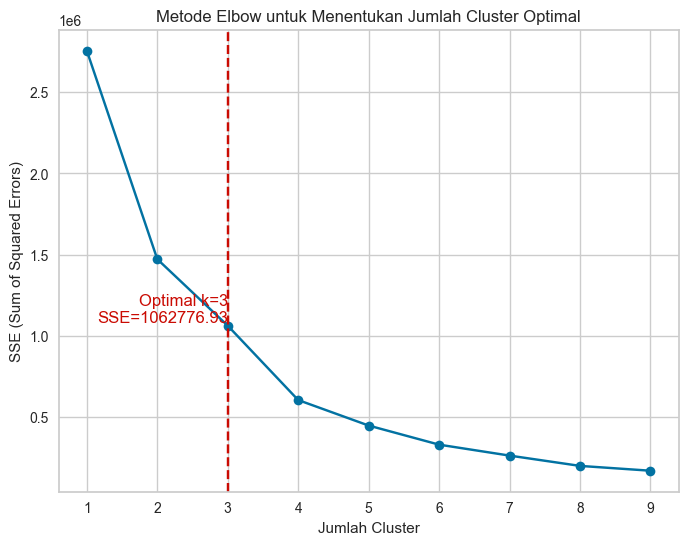

In [29]:
range_n_clusters = range(1, 10)
 
sse = []
 
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit_predict(splitted)
    sse.append(kmeans.inertia_)


slope_changes = np.diff(sse, 2)  
optimal_k = np.argmin(slope_changes) + 2 
 
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
 
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k, sse[optimal_k-1], f'Optimal k={optimal_k}\nSSE={sse[optimal_k-1]:.2f}', horizontalalignment='right', verticalalignment='bottom', color='r')
 
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [31]:
for column in raw_data.columns:
    X = raw_data.drop(columns=column)
    y = raw_data[column]
    
    selector = SelectKBest(score_func=chi2, k=2) # Pilih dua buah fitur
    X_new = selector.fit_transform(X, y)
    selected_feature = raw_data.iloc[:, selector.get_support(indices=True)]
    
    kmeans = KMeans(n_clusters=clusters)
    labels = kmeans.fit_predict(selected_feature)
    final_score = silhouette_score(selected_feature, labels=labels)
    print('Fitur yang diseleksi: ', ', '.join(selected_feature.columns), 'Dengan Silhouette Score: ', final_score, 'Selisih feature selection: ', score - final_score)   


Fitur yang diseleksi:  nationality, potential Dengan Silhouette Score:  0.5466036807403273 Selisih feature selection:  0.25456990400348123
Fitur yang diseleksi:  age, potential Dengan Silhouette Score:  0.3528309663926958 Selisih feature selection:  0.4483426183511127
Fitur yang diseleksi:  age, potential Dengan Silhouette Score:  0.34077220697735383 Selisih feature selection:  0.4604013777664547
Fitur yang diseleksi:  position, age Dengan Silhouette Score:  0.6382266428820009 Selisih feature selection:  0.16294694186180758
Fitur yang diseleksi:  position, potential Dengan Silhouette Score:  0.5632762864431814 Selisih feature selection:  0.2378972983006271
Fitur yang diseleksi:  hits, potential Dengan Silhouette Score:  0.8011735847438085 Selisih feature selection:  0.0
Fitur yang diseleksi:  nationality, hits Dengan Silhouette Score:  0.5600094493754871 Selisih feature selection:  0.24116413536832138


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

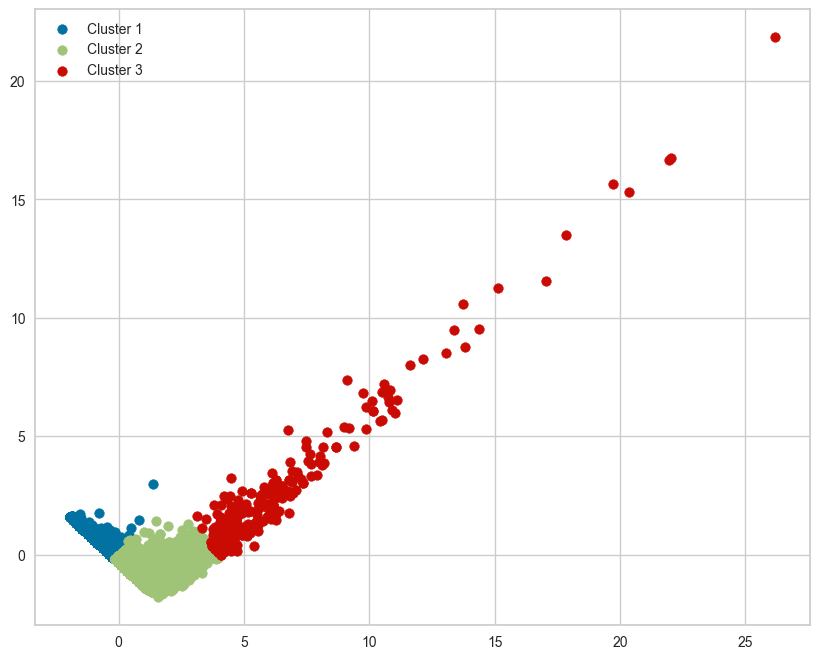

In [33]:
scaler = StandardScaler()
standarization = scaler.fit_transform(splitted)

pca = PCA(n_components=2)
score_pca = pca.fit_transform(standarization)

kmeans = KMeans(n_clusters=clusters)
labels = kmeans.fit_predict(score_pca)

plt.figure(figsize=(10, 8))

for cluster_id in range(clusters):
     cluster_mask = np.where(labels == cluster_id)
     plt.scatter(score_pca[cluster_mask, 0], score_pca[cluster_mask, 1], label=f'Cluster {cluster_id + 1}')


plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [44]:
def inverse_label(encoder, index):
    return np.array2string(encoder.inverse_transform([index]))[2:-2]

for i in range(clusters):
    clustered_data = raw_data[labels == i]
    
    mean_age = clustered_data['age'].mean()
    mean_hits = clustered_data['hits'].mean()
    mean_potential = clustered_data['potential'].mean()

    max_team = inverse_label(label_encoder_team, clustered_data['team'].max())
    max_nationality = inverse_label(label_encoder_nationality, clustered_data['nationality'].max())

    min_team = inverse_label(label_encoder_team, clustered_data['team'].min()) 
    min_nationality = inverse_label(label_encoder_nationality, clustered_data['nationality'].min())

    max_player = raw_data.iloc[clustered_data['hits'].idxmax()]
    print('-'*20)
    print(f'Cluster {i+1}')
    print(f'Rata-rata usia: {mean_age}, Rata-rata hits: {mean_hits}, Rata-rata potensi: {mean_potential}')
    print(f'Kebanyakan team dari: {max_team}, Kebanyakan asal dari: {max_nationality}')
    print(f'Sedikit team dari: {min_team}, Sedikit asal dari: {min_nationality}')
    print(f'Player unggul dalam cluster dengan mencetak {max_player["hits"]} goals dan asal dari {inverse_label(label_encoder_nationality, max_player["nationality"])}')
    print('-'*20)
    
    



--------------------
Cluster 1
Rata-rata usia: 27.77183129611276, Rata-rata hits: 0.4116286752560291, Rata-rata potensi: 67.00308336086334
Kebanyakan team dari: Östersunds FK , Kebanyakan asal dari: lbania
Sedikit team dari: 1. FC Heidenheim 1846 , Sedikit asal dari: Afghanistan
Player unggul dalam cluster dengan mencetak 36 goals dan asal dari England
--------------------
--------------------
Cluster 2
Rata-rata usia: 24.835110081112397, Rata-rata hits: 2.999420625724218, Rata-rata potensi: 76.24843568945539
Kebanyakan team dari: Östersunds FK , Kebanyakan asal dari: lbania
Sedikit team dari: 1. FC Heidenheim 1846 , Sedikit asal dari: Algeria
Player unggul dalam cluster dengan mencetak 36 goals dan asal dari Algeria
--------------------
--------------------
Cluster 3
Rata-rata usia: 24.381481481481483, Rata-rata hits: 69.39259259259259, Rata-rata potensi: 86.82592592592593
Kebanyakan team dari: Wolverhampton Wanderers , Kebanyakan asal dari: lbania
Sedikit team dari: AFC Bournemouth ,

Tulis hasil interpretasinya di sini.
1. Cluster 1: Cluster ini bisa dikatakan player yang memiliki potensi rata-rata dibawah 76, kebanyakan asal player adalah lBania dan rata-rata usianya adalah 27 tahun ini menunjukan bahwa cluster ini di isi oleh player potensialnya di paling bawah dan dengan maksimal cetakan goal hanya 36.
2. Cluster 2: Cluster ini bisa dikatakan player yang memiliki potensi midrange atau rata-ratanya adalah 76 dan rata-rata cetak goal dalam cluster ini lebih tinggi dari pada cluster 1, juga usia rata-ratanya menunjukan 24 tahun yang berarti cluster ini di penuhi player yang muda dengan potensi yang midrange.
3. Cluster 3: Cluster ini bisa dikatakan player yang memiliki potensi high-end yang dimana rata-rata goals di cluster ini lebih tinggi dibandingkan yang lain, dan player unggul dari cluster ini mencetak goal sebesar 371 yang menandakan cluster ini adalah cluster pemain handal.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [69]:

combined = []
for i in range(clusters):
    clustered_data = raw_data[labels == i].copy()
    clustered_data['class'] = i
    combined.append(clustered_data)

pd.concat(combined).to_csv("./data/clustered_data.csv", index=False)